In [45]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#import matplotlib.patches as patches
import pylab as pl
from PIL import Image

In [46]:
# for person on bike
weights0_path = '/Volumes/Mac 256/helmet detetion/yolov3-obj_final.weights/yolov3-obj_final.weights'
configuration0_path = '/Volumes/Mac 256/helmet detetion/yolov3_pb.cfg'

probability_minimum = 0.5
threshold = 0.3

In [47]:
network0 = cv2.dnn.readNetFromDarknet(configuration0_path, weights0_path)
output_layer_indices = network0.getUnconnectedOutLayers()


layers_names0_all = network0.getLayerNames()
layers_names0_output = [layers_names0_all[i - 1] for i in output_layer_indices]


#layers_names0_all = network0.getLayerNames()
#layers_names0_output = [layers_names0_all[i[0]-1] for i in network0.getUnconnectedOutLayers()]
labels0 = open('/Volumes/Mac 256/helmet detetion/coco.names').read().strip().split('\n')
print(labels0)

['person_bike']


In [48]:
print(network0.getLayerNames())

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [49]:
# for helmet
weights1_path = '/Volumes/Mac 256/helmet detetion/yolov3-helmet.weights/yolov3-helmet.weights'
configuration1_path = '/Volumes/Mac 256/helmet detetion/yolov3-helmet.cfg'

In [50]:
network1 = cv2.dnn.readNetFromDarknet(configuration1_path, weights1_path)
output_layer_indices = network1.getUnconnectedOutLayers()


layers_names1_all = network1.getLayerNames()
layers_names1_output = [layers_names1_all[i - 1] for i in output_layer_indices]
    

#layers_names0_all = network0.getLayerNames()
#layers_names0_output = [layers_names0_all[i[0]-1] for i in network0.getUnconnectedOutLayers()]
labels1 = open('/Volumes/Mac 256/helmet detetion/helmet.names').read().strip().split('\n')
print(labels0)

['person_bike']


In [51]:
print(layers_names0_output)

['yolo_82', 'yolo_94', 'yolo_106']


In [52]:
image_input = cv2.imread('/Volumes/Mac 256/helmet detetion/a.jpeg')
blob = cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB=True,crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network0.setInput(blob)
network1.setInput(blob)
output_from_network0 = network0.forward(layers_names0_output)
output_from_network1 = network1.forward(layers_names1_output)
np.random.seed(42)
colours0 = np.random.randint(0,255,size=(len(labels0),3),dtype='uint8')
colours1 = np.random.randint(0,255,size=(len(labels1),3),dtype='uint8')

print(colours0)
print(colours1)

[[102 220 225]]
[[179  61 234]]


In [53]:
bounding_boxes0 = []
confidences0 = []
class_numbers0 = []

bounding_boxes1 = []
confidences1 = []
class_numbers1 = []

h,w = image_input.shape[:2]

for result in output_from_network0:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            
            bounding_boxes0.append([x_min,y_min,int(box_width),int(box_height)])
            confidences0.append(float(confidence_current))
            class_numbers0.append(class_current)
            
for result in output_from_network1:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            
            bounding_boxes1.append([x_min,y_min,int(box_width),int(box_height)])
            confidences1.append(float(confidence_current))
            class_numbers1.append(class_current)   

In [54]:
results0 = cv2.dnn.NMSBoxes(bounding_boxes0,confidences0,probability_minimum,threshold)

if len(results0) > 0:
    for i in results0.flatten():
        x_min,y_min=bounding_boxes0[i][0],bounding_boxes0[i][1]
        box_width,box_height= bounding_boxes0[i][2],bounding_boxes0[i][3]
        colour_box_current=[int(j) for j in colours0[class_numbers0[i]]]   
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,4)
        text_box_current0='{}: {:.2f}'.format(labels0[int(class_numbers0[i])],confidences0[i])
        cv2.putText(image_input,text_box_current0,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,.6,colour_box_current,2)

In [55]:
results1 = cv2.dnn.NMSBoxes(bounding_boxes1,confidences1,probability_minimum,threshold)

if len(results1) > 0:
    for i in results1.flatten():
        x_min,y_min=bounding_boxes1[i][0],bounding_boxes1[i][1]
        box_width,box_height= bounding_boxes1[i][2],bounding_boxes1[i][3]
        colour_box_current=[int(j) for j in colours1[class_numbers1[i]]]   
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,4)
        text_box_current1='{}: {:.2f}'.format(labels1[int(class_numbers1[i])],confidences1[i])
        cv2.putText(image_input,text_box_current1,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,0.6,colour_box_current,2)

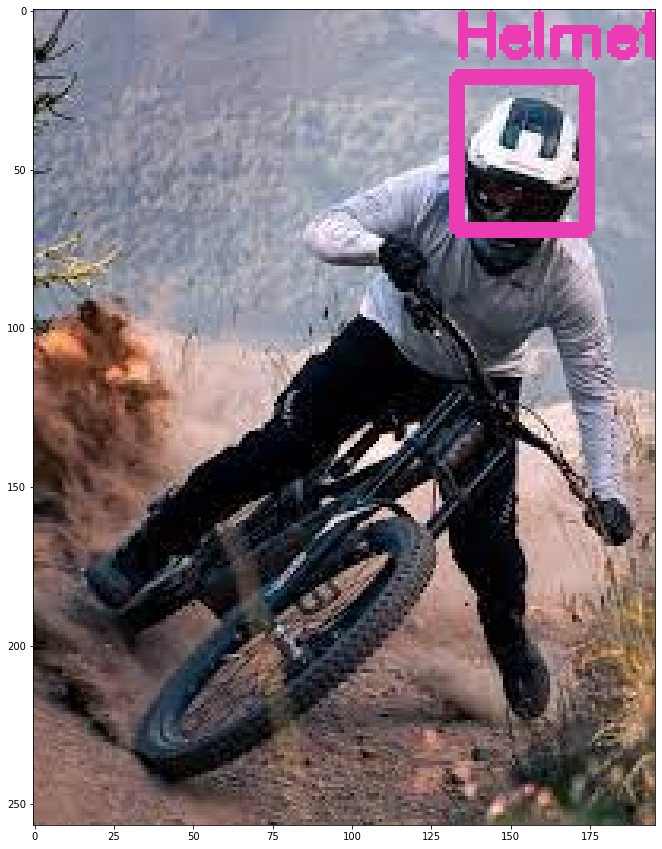

In [56]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0,15.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()